In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [113]:
import numpy as np
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

#READING THE CORPUS
with open('/content/gdrive/My Drive/sem4/nlp/hierarchical_corpus.txt', 'r') as f:
  corpus = f.read()
s = word_tokenize(corpus)
pair = {}
idx =0
while idx < len(s) - 1:
  pair[s[idx]] = []
  pair[s[idx]].append(s[idx+1])
  idx+=2

lab = int(len(s)/2)
id = 0

#CONVERTING THE WORDS INTO X,Y COORDINATES USING CLOSEST NOUN AND VERB DISTANCES
vd = 2000
nd = 2000
id = 1
nid = 1
finalnoun = 0
finalverb = 0
while id < len(s):
  nid = 1
  if (s[id]=='N_NNP' or s[id]=='N_NN'):
    finalnoun = id
  if (s[id]=='V_VM'):
    finalverb = id 
  while nid < len(s):
    if (s[nid]=='N_NNP' or s[nid]=='N_NN') and abs(nid-id) < nd and nid!=id:
      nd = abs(nid-id)
      finalnoun = nid
    
    if (s[nid]=="V_VM") and nid!=id and abs(nid-id) < vd:
      vd = abs(nid-id)
      finalverb = nid
  
    nid+=2
  temp = []
  temp.append(int(id/2)+1)
  temp.append(finalnoun+id-1)
  temp.append(finalverb+id-1)
  pair[s[id-1]].append(temp)
  temp = []
  id+=2
print(corpus)
print()
print(pair)
print()
X = np.zeros((28,2), dtype=int)

for v in pair.values():
  vid = 1
  while vid < len(v):
    # print(v[vid])
    X[v[vid][0]-1][0] = v[vid][1]
    X[v[vid][0]-1][1] = v[vid][2]
    vid += 1
print(X)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
शौकत	N_NNP
महल	N_NNP
के	PSP
सामने	N_NST
बड़ी	JJ
झील	N_NN
के	PSP
किनारे	N_NN
स्थित	JJ
वास्तुकला	N_NN
का	PSP
यह	DM_DMD
खूबसूरत	JJ
नमूना	N_NN
कुदसिया	N_NNP
बेगम	N_NNP
के	PSP
काल	N_NN
का	PSP
है	V_VM
जिन्हें	PR_PRL
गोहर	N_NNP
बेगम	N_NNP
भी	RP_RPD
कहा	V_VM
जाता	V_VAUX
था	V_VAUX
।	RD_PUNC

{'शौकत': ['N_NNP', [1, 3, 39]], 'महल': ['N_NNP', [2, 5, 41]], 'के': ['PSP', [3, 7, 43], [7, 23, 51], [17, 63, 71]], 'सामने': ['N_NST', [4, 9, 45]], 'बड़ी': ['JJ', [5, 11, 47]], 'झील': ['N_NN', [6, 21, 49]], 'किनारे': ['N_NN', [8, 29, 53]], 'स्थित': ['JJ', [9, 31, 55]], 'वास्तुकला': ['N_NN', [10, 37, 57]], 'का': ['PSP', [11, 39, 59], [19, 71, 75]], 'यह': ['DM_DMD', [12, 41, 61]], 'खूबसूरत': ['JJ', [13, 43, 63]], 'नमूना': ['N_NN', [14, 53, 65]], 'कुदसिया': ['N_NNP', [15, 57, 67]], 'बेगम': ['N_NNP', [16, 61, 69], [23, 89, 83]], 'काल': ['N_NN', [18, 69, 73]], 'है': ['V_VM', [20, 73, 77]], 'जिन्हें': ['PR

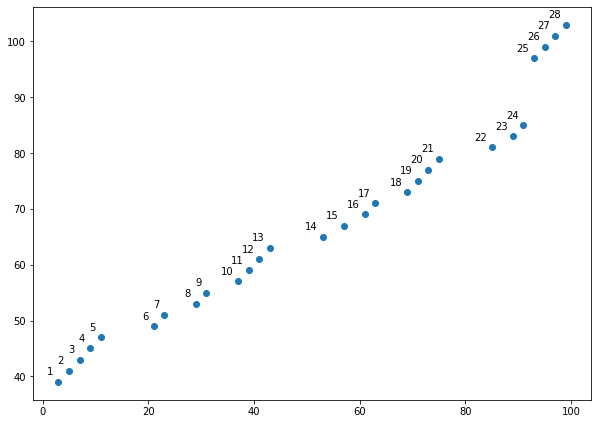

In [114]:
#PLOTTING THE CONVERTED X,Y COORDINATES OF WORDS

import matplotlib.pyplot as plt
labels = range(1,29)
plt.figure(figsize=(10,7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label="True Position")
for label, x, y, in zip(labels, X[:,0], X[:,1]):
  plt.annotate(label, xy=(x,y), xytext=(-5,5), textcoords='offset points', ha='right', va='bottom')
plt.show()

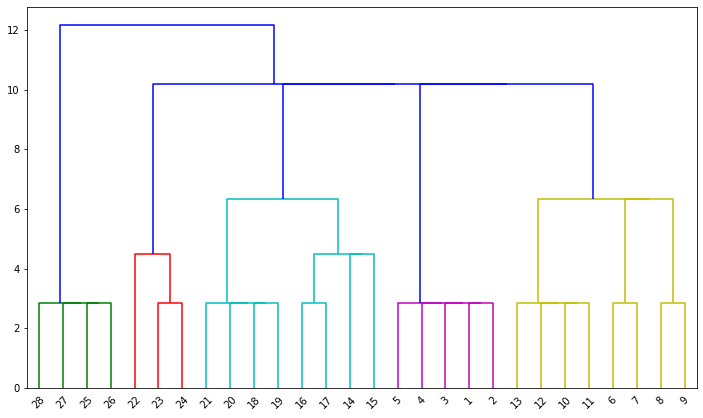

In [115]:
#PLOTTING DENDROGRAM TO MANUALLY DECIDE THE OPTIMAL NUMBER OF CLUSTERS

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(X, 'single')
label = range(1,29)
plt.figure(figsize=(12,7))
dendrogram(linked, orientation='top', labels=label, distance_sort='descending', show_leaf_counts=True)
plt.show()

In [116]:
#FINDING THE CHUNKS USING AGGLOMERATIVE HIERARCHICAL CLUSTERING

from sklearn.cluster import AgglomerativeClustering as acl

cluster = acl(n_clusters=11, affinity='euclidean', linkage='ward')

cluster.fit_predict(X)
print(cluster.labels_)
final_cluster = []
temp_cluster = []
temp_cluster.append({s[0]:s[1]})
sidx = 2
for c in range(1,len(cluster.labels_)):
  if cluster.labels_[c] == cluster.labels_[c-1]:
    temp_cluster.append({s[sidx]:s[sidx+1]})
    sidx+=2
  else:
    final_cluster.append(temp_cluster)
    temp_cluster = []
    temp_cluster.append({s[sidx]:s[sidx+1]})
    sidx+=2
final_cluster.append(temp_cluster)
print()
print(final_cluster)

[ 9  9  4  4  4  7  7  6  6  2  2  2  2  3  3  8  8  0  0  0  0  1  1  1
 10 10  5  5]

[[{'शौकत': 'N_NNP'}, {'महल': 'N_NNP'}], [{'के': 'PSP'}, {'सामने': 'N_NST'}, {'बड़ी': 'JJ'}], [{'झील': 'N_NN'}, {'के': 'PSP'}], [{'किनारे': 'N_NN'}, {'स्थित': 'JJ'}], [{'वास्तुकला': 'N_NN'}, {'का': 'PSP'}, {'यह': 'DM_DMD'}, {'खूबसूरत': 'JJ'}], [{'नमूना': 'N_NN'}, {'कुदसिया': 'N_NNP'}], [{'बेगम': 'N_NNP'}, {'के': 'PSP'}], [{'काल': 'N_NN'}, {'का': 'PSP'}, {'है': 'V_VM'}, {'जिन्हें': 'PR_PRL'}], [{'गोहर': 'N_NNP'}, {'बेगम': 'N_NNP'}, {'भी': 'RP_RPD'}], [{'कहा': 'V_VM'}, {'जाता': 'V_VAUX'}], [{'था': 'V_VAUX'}, {'।': 'RD_PUNC'}]]


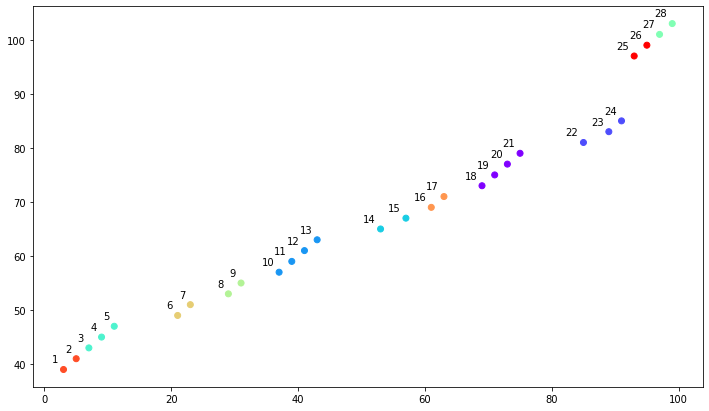

In [117]:
#PLOTTING THE CLUSTERS FOUND USING HIERARCHICAL CLUSTERING

plt.figure(figsize=(12,7))
plt.scatter(X[:,0],X[:,1], c=cluster.labels_,cmap='rainbow')
for label, x, y, in zip(labels, X[:,0], X[:,1]):
  plt.annotate(label, xy=(x,y), xytext=(-5,5), textcoords='offset points', ha='right', va='bottom')
plt.show()